In [1]:
from __future__ import absolute_import, division, print_function # Python2 compatibility
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from The_Payne import utils
from The_Payne import training

import torch
from The_Payne import spectral_model
from The_Payne import fitting
import os

wavelength shape is 14304

In [2]:
wavelength = utils.load_wavelength_array(survey='galah')

利用utils下载训练集

In [3]:
training_labels, training_spectra, validation_labels, validation_spectra = \
utils.load_training_data(survey='galah',size = 6000)

The model_grid has the following keywords:
dict_keys(['wavelength', 'teff', 'logg', 'feh', 'alpha_fe', 'broad', 'smod'])
Whole training set: 6000
Redefined training set (4800) and validation set (1200)
1200


In [5]:
index_training_labels = np.where(training_labels[:,0] < 7250.)
index_validation_labels = np.where(validation_labels[:,0] < 7250.)

In [6]:
training_labels = training_labels[index_training_labels[0]]
training_spectra = training_spectra[index_training_labels[0]]
validation_labels = validation_labels[index_validation_labels[0]]
validation_spectra = validation_spectra[index_validation_labels[0]]

In [7]:
validation_labels.shape

(967, 5)

In [8]:
training_labels.shape

(3912, 5)

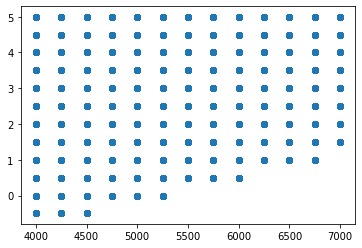

In [9]:
plt.scatter(training_labels.T[0],training_labels.T[1])

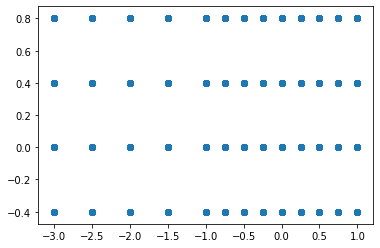

In [10]:
plt.scatter(validation_labels.T[2],validation_labels.T[3])

galah_model_grid = utils.get_model_grid()

#Thomas grid has been interpolated so next code is markdown.
#import scipy
#interpolated_training_spectra = np.array([scipy.interp(wavelength, galah_model_grid['wavelength'], training_spectra[x]) for x in range(2410)])
#interpolated_validation_spectra = np.array([scipy.interp(wavelength, galah_model_grid['wavelength'], validation_spectra[x]) for x in range(613)])

#样条插值
from scipy import interpolate
interpolated_training_spectra = []
interpolated_validation_spectra = []
for x in range(3253):
    interpolated = np.array(interpolate.splev(wavelength, interpolate.splrep(galah_model_grid['wavelength'], training_spectra[x], s=0), der=0))
    interpolated_training_spectra.append(interpolated)
    
for y in range(803):
    interpolated = np.array(interpolate.splev(wavelength, interpolate.splrep(galah_model_grid['wavelength'], validation_spectra[y], s=0), der=0))
    interpolated_validation_spectra.append(interpolated)

interpolated_training_spectra = np.array(interpolated_training_spectra)
interpolated_validation_spectra = np.array(interpolated_validation_spectra)

training_labels = training_labels.astype(np.float64)
training_spectra = (interpolated_training_spectra).astype(np.float64)
validation_labels = validation_labels.astype(np.float64)
validation_spectra = (interpolated_validation_spectra).astype(np.float64)

In [11]:
training_loss, validation_loss = training.neural_net(training_labels, training_spectra,\
                                                     validation_labels, validation_spectra,\
                                                     num_neurons = 300, num_steps=65000, learning_rate=0.001)

Step 1000: Training set loss = 35.076 / Validation set loss = 34.62
Step 2000: Training set loss = 17.378 / Validation set loss = 16.822
Step 3000: Training set loss = 9.233 / Validation set loss = 8.726
Step 4000: Training set loss = 4.913 / Validation set loss = 4.764
Step 5000: Training set loss = 3.487 / Validation set loss = 3.44
Step 6000: Training set loss = 2.638 / Validation set loss = 2.621
Step 7000: Training set loss = 2.045 / Validation set loss = 2.056
Step 8000: Training set loss = 3.512 / Validation set loss = 3.577
Step 9000: Training set loss = 1.335 / Validation set loss = 1.42
Step 10000: Training set loss = 1.593 / Validation set loss = 1.684
Step 11000: Training set loss = 1.062 / Validation set loss = 1.172
Step 12000: Training set loss = 0.939 / Validation set loss = 1.053
Step 13000: Training set loss = 0.871 / Validation set loss = 0.984
Step 14000: Training set loss = 0.774 / Validation set loss = 0.888
Step 15000: Training set loss = 0.715 / Validation set l

In [ ]:
#training_loss, validation_loss = training.neural_net(training_labels, training_spectra, validation_labels, validation_spectra,\
#             num_neurons = 300, num_steps=1e4, learning_rate=1e-4, batch_size=150,\
#             num_pixel=14304)

Text(0, 0.5, 'Loss')

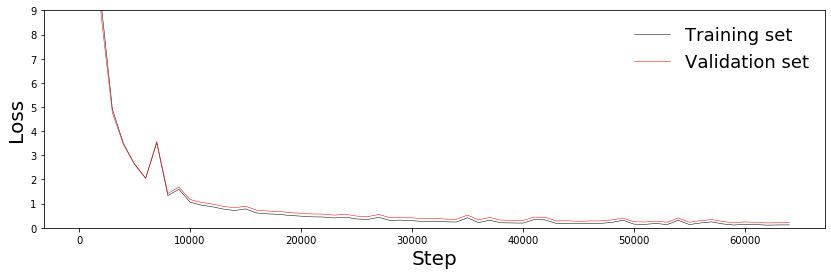

In [69]:
tmp = np.load("NN_normalized_spectra.npz") 
training_loss = tmp["training_loss"]
validation_loss = tmp["validation_loss"]

plt.figure(figsize=(14, 4))
plt.ylim(0,9)
plt.plot(np.arange(training_loss.size)*1000, training_loss, 'k', lw=0.5, label = 'Training set')
plt.plot(np.arange(training_loss.size)*1000, validation_loss, 'r', lw=0.5, label = 'Validation set')
plt.legend(loc = 'best', frameon = False, fontsize= 18)
plt.xlabel("Step", size=20)
plt.ylabel("Loss", size=20)

In [30]:
training_loss

array([35.07631683, 17.37838364,  9.23341179,  4.91313648,  3.48716688,
        2.63830018,  2.04560804,  3.51272631,  1.33530915,  1.59387183,
        1.06292963,  0.93917924,  0.87134206,  0.77476186,  0.71501172,
        0.78068364,  0.61364532,  0.57676274,  0.55616486,  0.50891483,
        0.48251942,  0.45289469,  0.44627085,  0.40682039,  0.44008571,
        0.3664436 ,  0.34398898,  0.4361614 ,  0.3060382 ,  0.31805074,
        0.29300934,  0.26215002,  0.27405423,  0.24771459,  0.23695646,
        0.41622287,  0.21481593,  0.31365016,  0.20837043,  0.20084246,
        0.19399062,  0.33744603,  0.32770577,  0.1808832 ,  0.18559706,
        0.16781764,  0.17802748,  0.18341874,  0.22131754,  0.31542808,
        0.15150224,  0.14321971,  0.17839944,  0.13397913,  0.31327176,
        0.1334067 ,  0.19973391,  0.24407227,  0.16169906,  0.11350394,
        0.14756086,  0.1327247 ,  0.10937902,  0.1180836 ,  0.11981697])

In [31]:
tmp.files

['w_array_0',
 'w_array_1',
 'w_array_2',
 'b_array_0',
 'b_array_1',
 'b_array_2',
 'x_max',
 'x_min',
 'training_loss',
 'validation_loss']